## Pips e Imports necessários


In [2]:
pip install opencv-python tensorflow numpy matplotlib ipywebrtc colabcam pyngrok seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.9 MB/s eta 0:00:00
  Created wheel for colabcam: filename=colabcam-1.0.3-py3-none-any.whl size=5487 sha256=bd40ec6c477b9a9d6bbbacf60fc1c369b105ebd3e88a83724ab9d7d88084a71d
  Stored in directory: /root/.cache/pip/wheels/5a/ec/08/a87ee87cbf9c5d825e3433eb730e708d708e02158cd56f9606
Successfully built colabcam


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jpufma","key":"a8c79728130d05c7957707adbf61aa2d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d grassknoted/asl-alphabet
!kaggle datasets download -d danrasband/asl-alphabet-test
!kaggle datasets download -d datamunge/sign-language-mnist
!unzip asl-alphabet.zip
!unzip asl-alphabet-test.zip
!unzip sign-language-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing774.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing775.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing776.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing777.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing778.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing779.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing78.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing780.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing781.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing782.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing783.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing784.jpg  
  inflating: asl_alphabet_train/asl_al

## Primeiro Modelo

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 870 images belonging to 29 classes.
Epoch 1/10
2175/2175 [==============================] - 332s 152ms/step - loss: 1.6876 - accuracy: 0.4782 - val_loss: 1.3367 - val_accuracy: 0.5809
Epoch 2/10
2175/2175 [==============================] - 328s 151ms/step - loss: 0.6435 - accuracy: 0.7854 - val_loss: 1.0968 - val_accuracy: 0.6744
Epoch 3/10
2175/2175 [==============================] - 302s 139ms/step - loss: 0.4216 - accuracy: 0.8584 - val_loss: 0.9963 - val_accuracy: 0.7045
Epoch 4/10
2175/2175 [==============================] - 304s 140ms/step - loss: 0.3402 - accuracy: 0.8855 - val_loss: 1.0195 - val_accuracy: 0.7196
Epoch 5/10
2175/2175 [==============================] - 327s 151ms/step - loss: 0.2838 - accuracy: 0.9051 - val_loss: 0.9324 - val_accuracy: 0.7375
Epoch 6/10
2175/2175 [==============================] - 304s 140ms/step - loss: 0.2479 - accuracy: 0.9174 - val_loss: 1.0436 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


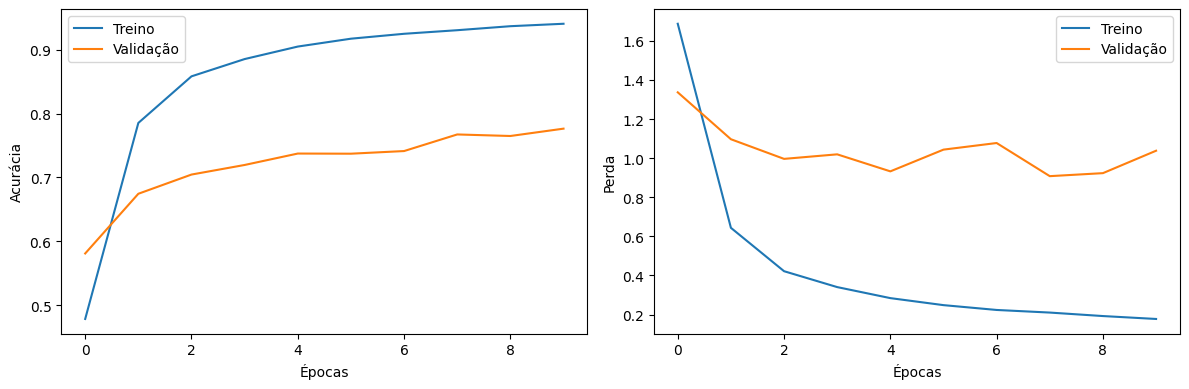

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Import dos dados
train_data_dir = "/content/asl_alphabet_train/asl_alphabet_train"
test_data_dir = "/content/asl-alphabet-test"

#Parâmetros básicos
input_shape = (64, 64, 3)
batch_size = 32

#Geradores de dados para treinamento e teste com data augmentation
def adjust_contrast(img):
    return tf.image.adjust_contrast(img, 2.0)  #Depois ir ajustando para ver se melhora alguma coisa

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=lambda x: adjust_contrast(tf.image.resize(x, (input_shape[0], input_shape[1])))
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

#Construir o modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))  #29 classes no conjunto de dados ASL

#Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

#Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator)
print(f'Teste - Perda: {test_loss}, Acurácia: {test_acc}')

#Salvar o modelo treinado
model.save('asl_detection_model.h5')

#Visualizar o desempenho do treinamento
plt.figure(figsize=(12, 4))

#Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

#Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.tight_layout()
plt.show()

27/27 [==============================] - 1s 24ms/step - loss: 6.8444 - accuracy: 0.2350
Teste - Perda: 6.844368934631348, Acurácia: 0.23495370149612427


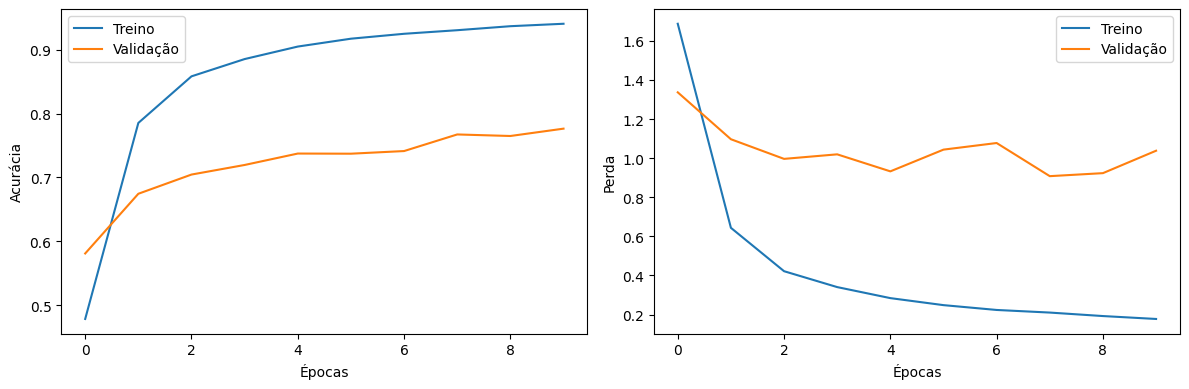

In [ ]:
#Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Teste - Perda: {test_loss}, Acurácia: {test_acc}')

#Salvar o modelo treinado
model.save('asl_detection_model.h5')

#Visualizar o desempenho do treinamento
plt.figure(figsize=(12, 4))

#Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

#Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

image_path = "/content/Y/Y0002_test.jpg"

#Carregar a imagem e obter suas dimensões
img = Image.open(image_path)
width, height = img.size

print(f"Dimensões da imagem: {width} x {height}")

Dimensões da imagem: 200 x 200


## Segundo Modelo

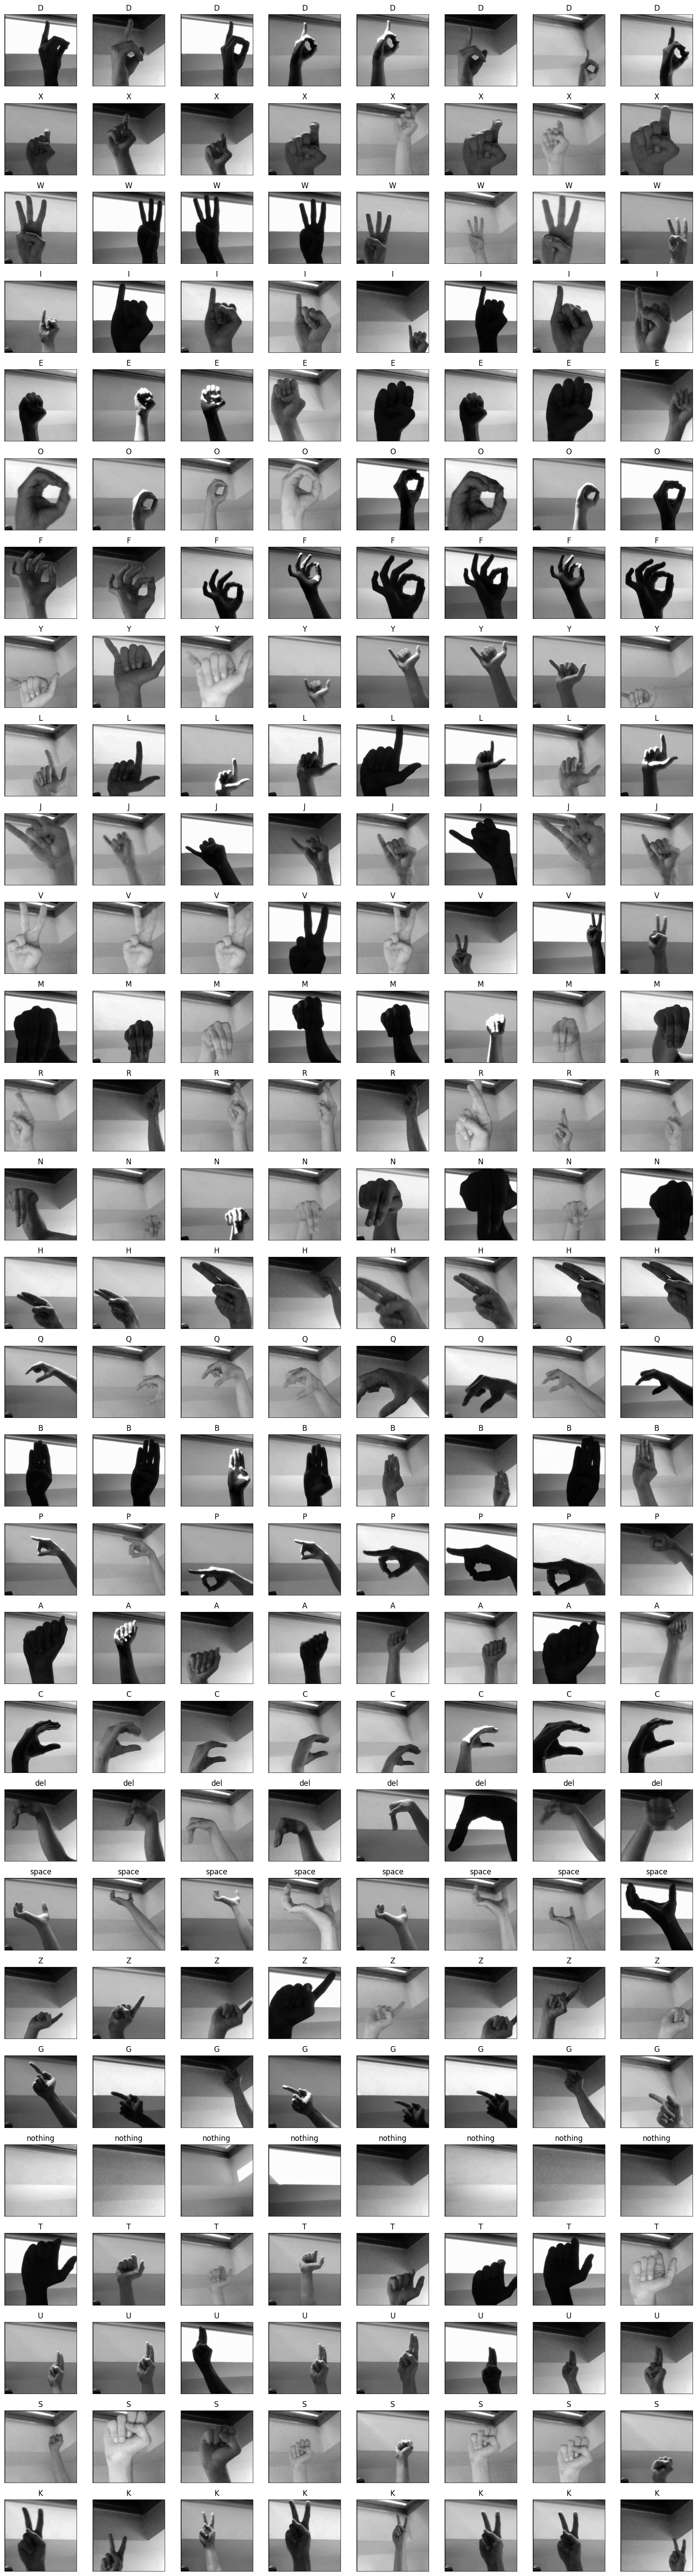

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

#Conjunto de dados
dataset_dir = "/content/asl_alphabet_train/asl_alphabet_train"

#Listar todas as classes (subdiretórios)
classes = os.listdir(dataset_dir)

#Plotar exemplos de imagens para cada classe
fig, axes = plt.subplots(len(classes), 8, figsize=(16, 2 * len(classes)))

for i, class_name in enumerate(classes):
    #Diretório da classe
    class_dir = os.path.join(dataset_dir, class_name)

    #Listar arquivos de imagem na classe
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for j in range(8):
        if j < len(image_files):
            #Caminho completo da imagem
            img_path = os.path.join(class_dir, image_files[j])

            #Carregar a imagem usando OpenCV
            img = cv2.imread(img_path)

            #Verificar se a imagem foi carregada com sucesso
            if img is not None and img.size > 0:
                #Converter a imagem para escala de cinza
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                #Exibir a imagem
                axes[i, j].imshow(img_gray, cmap='gray')
                axes[i, j].set_title(class_name)
                axes[i, j].axis('off')
            else:
                print(f"Falha ao carregar a imagem: {img_path}")
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 870 images belonging to 29 classes.
Epoch 1/10
2175/2175 [==============================] - 1047s 478ms/step - loss: 1.9836 - accuracy: 0.3892 - val_loss: 1.7753 - val_accuracy: 0.4452
Epoch 2/10
2175/2175 [==============================] - 1043s 480ms/step - loss: 0.9581 - accuracy: 0.6827 - val_loss: 1.3282 - val_accuracy: 0.5791
Epoch 3/10
2175/2175 [==============================] - 1037s 477ms/step - loss: 0.6895 - accuracy: 0.7698 - val_loss: 1.1719 - val_accuracy: 0.6171
Epoch 4/10
2175/2175 [==============================] - 1026s 472ms/step - loss: 0.5406 - accuracy: 0.8179 - val_loss: 1.3026 - val_accuracy: 0.6209
Epoch 5/10
2175/2175 [==============================] - 1021s 469ms/step - loss: 0.4613 - accuracy: 0.8454 - val_loss: 0.9773 - val_accuracy: 0.6966
Epoch 6/10
2175/2175 [==============================] - 1043s 480ms/step - loss: 0.4056 - accuracy: 0.8639 - val_loss: 1.1437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


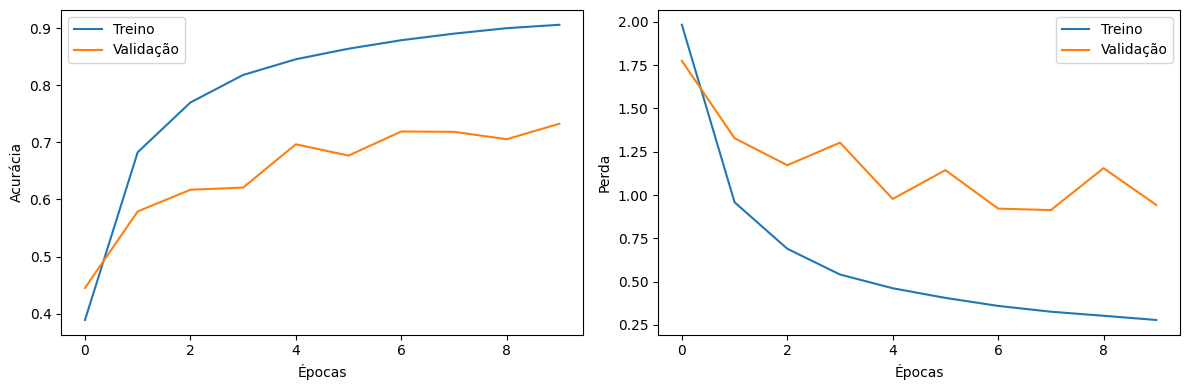

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Import dos dados
train_data_dir = "/content/asl_alphabet_train/asl_alphabet_train" #Dataset de treino
test_data_dir = "/content/asl-alphabet-test" #Dataset só para testes

#Parâmetros básicos
input_shape = (200, 200, 3)
batch_size = 32

#Geradores de dados para treinamento e teste com data augmentation
def adjust_contrast(img):
    return tf.image.adjust_contrast(img, 2.0)  #Depois ir ajustando para ver se melhora alguma coisa

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=lambda x: adjust_contrast(tf.image.resize(x, (input_shape[0], input_shape[1])))
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

#Construir o modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))  #29 classes no conjunto de dados ASL

#Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

#Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator)
print(f'Teste - Perda: {test_loss}, Acurácia: {test_acc}')

#Salvar o modelo treinado
model.save('asl_detection_model_2.h5')

#Visualizar o desempenho do treinamento
plt.figure(figsize=(12, 4))

#Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

#Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.tight_layout()
plt.show()

## Terceiro Modelo

In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Dados
train_data_dir = "/content/sign_mnist_train/sign_mnist_train.csv"
test_data_dir = "/content/sign_mnist_test/sign_mnist_test.csv"

#Carregar os dados
train_set = pd.read_csv(train_data_dir)
test_set = pd.read_csv(test_data_dir)

#Pré-processamento dos dados
X_train = train_set.iloc[:, 1:].values
y_train = train_set.iloc[:, 0].values

X_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values

X_train = np.array([np.reshape(i, (28, 28)) for i in X_train])
X_test = np.array([np.reshape(i, (28, 28)) for i in X_test])

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = tf.keras.utils.to_categorical(y_train, 26)
y_test = tf.keras.utils.to_categorical(y_test, 26)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#Normalização dos dados
X_train = X_train / 255.0
X_test = X_test / 255.0

#Augmentação de dados para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

#Ajustar o gerador de dados de treinamento
train_datagen.fit(X_train)

#Modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))  #26 classes no conjunto de dados Sign Language MNIST

#Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Treinar o modelo com data augmentation
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    epochs=15,
    validation_data=(X_test, y_test)
)

#Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Teste - Perda: {test_loss}, Acurácia: {test_acc}')

#Salvar o modelo treinado
model.save('sign_language_model.h5')

Epoch 1/15
857/857 [==============================] - 40s 46ms/step - loss: 1.9977 - accuracy: 0.3879 - val_loss: 0.8732 - val_accuracy: 0.7016
Epoch 2/15
857/857 [==============================] - 41s 48ms/step - loss: 0.8807 - accuracy: 0.7115 - val_loss: 0.4474 - val_accuracy: 0.8581
Epoch 3/15
857/857 [==============================] - 49s 56ms/step - loss: 0.5802 - accuracy: 0.8120 - val_loss: 0.2862 - val_accuracy: 0.9222
Epoch 4/15
857/857 [==============================] - 52s 61ms/step - loss: 0.4428 - accuracy: 0.8604 - val_loss: 0.2313 - val_accuracy: 0.9274
Epoch 5/15
857/857 [==============================] - 41s 47ms/step - loss: 0.3569 - accuracy: 0.8819 - val_loss: 0.2139 - val_accuracy: 0.9209
Epoch 6/15
857/857 [==============================] - 41s 47ms/step - loss: 0.2917 - accuracy: 0.9053 - val_loss: 0.1252 - val_accuracy: 0.9626
Epoch 7/15
857/857 [==============================] - 45s 52ms/step - loss: 0.2477 - accuracy: 0.9203 - val_loss: 0.1358 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


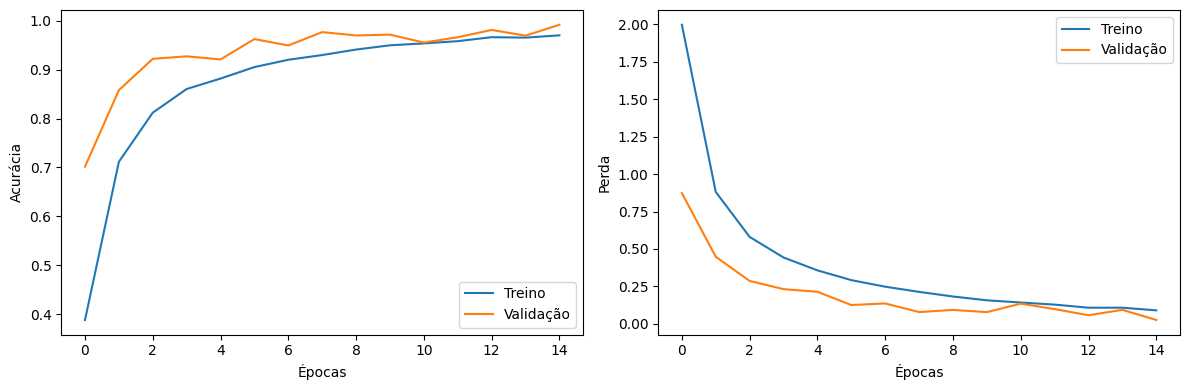

In [ ]:
#Visualizar o desempenho do treinamento
plt.figure(figsize=(12, 4))

#Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

#Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.tight_layout()
plt.show()